In [3]:
import matplotlib.pyplot as plt
# plt.style.use('JGW')
import numpy as np
from numpy import exp, sqrt
import pandas as pd
%matplotlib notebook

# Forward potential sweep 

The prelab for E5 presents a crude cyclic voltammogram model of redox species in a stagnant electrolyte system. Code block 1 calculates current versus potential response based off this model for a positive potential sweep. This generates an interactive plot window. Running code block 2 will overlay new plots to the interactive window under code block 1. Running code block 1 will reset the interactive window. 

In the prelab you will examine the effect of changing scan rate 'v' and initial scan potential 'Einitial' by overlaying different plots. 


<IPython.core.display.Javascript object>


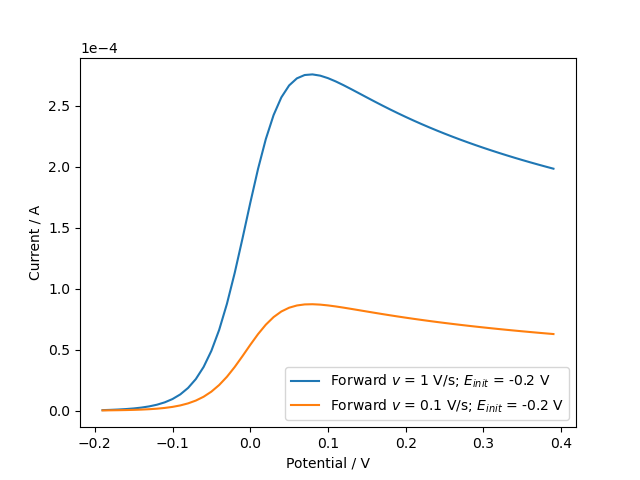

In [6]:
'''Code block 1'''

# constants
R = 8.314        # gas constant in J/mol*K
T = 298          # temperature in K
n = 1            # number of electrons transferred per rxn
F = 96485        # electronic charge in C/mol
A = 1            # area in cm^2
D = 1e-5         # diffusion constant in cm^2/s
ctotal = 1e-6    # total concentration in mol/cm^3
E0 = 0           # standard reduction potential in V
Einit = E0 - 0.2 # initial potential in V
v = 1            # sweep rate in V/s

# this creates a time array from 0.01 to 0.6 at 0.01 intervals
t = np.arange(0.01, 0.6, 0.01)

# Cell potential as a function of time (equation 7 in the prelab)
Ecell = Einit+v*t

# concentration of reduced species intinitely far away from electrode and at the electrode (equations 4-5 in prelab)
c_red_inf = ctotal/ (1+exp((Einit-E0) / (R*T/n/F)))
c_red_zero = ctotal/ (1+exp((Ecell-E0) / (R*T/n/F)))

# Change in concentration of the reduced species from infinity to the electrode (equation 3 in the prelab)
Deltac = c_red_inf - c_red_zero

# depletion layer thickness (equation 6 in the prelab)
delta = sqrt(4*D*t)

# current during forward sweep (equation 1 in the prelab)
i_f = n*F*A*D*Deltac/delta

# plot current vs cell potential

plt.plot(Ecell, i_f, label = 'Forward $v$ = '+str(v)+' V/s; $E_{init}$ = '+str(Einit)+' V')
plt.xlabel('Potential / V')
plt.ylabel('Current / A')
plt.ticklabel_format(axis="both", style="sci", scilimits=(-2,3))
plt.legend()


In [7]:
'''Code block 2'''

# constants
R = 8.314        # gas constant in J/mol*K
T = 298          # temperature in K
n = 1            # number of electrons transferred per rxn
F = 96485        # electronic charge in C/mol
A = 1            # area in cm^2
D = 1e-5         # diffusion constant in cm^2/s
ctotal = 1e-6    # total concentration in mol/cm^3
E0 = 0           # standard reduction potential in V
Einit = E0 - 0.2 # initial potential in V
v = 0.1            # sweep rate in V/s

# this creates a time array from 0.01 to 0.6 at 0.01 intervals
t = np.arange(0.1, 6, 0.1)

# Cell potential as a function of time (equation 7 in the prelab)
Ecell = Einit + v*t

# concentration of reduced species intinitely far away from electrode and at the electrode (equations 4-5 in prelab)
c_red_inf = ctotal/ (1+exp((Einit-E0) / (R*T/n/F)))
c_red_zero = ctotal/ (1+exp((Ecell-E0) / (R*T/n/F)))

# Change in concentration of the reduced species from infinity to the electrode (equation 3 in the prelab)
Deltac = c_red_inf - c_red_zero

# depletion layer thickness (equation 6 in the prelab)
delta = sqrt(4*D*t)

# current during forward sweep (equation 1 in the prelab)
i_f = n*F*A*D*Deltac/delta

# plot current vs cell potential
plt.plot(Ecell, i_f, label = 'Forward $v$ = '+str(v)+' V/s; $E_{init}$ = '+str(Einit)+' V')
plt.xlabel('Potential / V')
plt.ylabel('Current / A')
plt.ticklabel_format(axis="both", style="sci", scilimits=(-2,3))
plt.legend()



# Full cyclic voltammogram

Code blocks 3 and 4 calculates a full cyclic voltammogram based off the crude model. Code block 3 demonstrates a case where the reverse faradaic reaction cannot occur while code block 4 shows a case where it is included

In [11]:
'''Code block 3 with no reaction'''

# constants
R=8.314        # gas constant in J/mol*K
T=298          # temperature in K
n=1            # number of electrons transferred per rxn
F=96485        # electronic charge in C/mol
A=1            # area in cm^2
D=1e-5         # diffusion constant in cm^2/s
ctotal=1e-6    # total concentration in mol/cm^3   
E0=0           # standard potential in V
Einit=-0.2  # initial potential in V
v=1            # sweep rate in V/s


'''forward scan (same as code block 1-2)'''
# this creates a time array from 0.01 to 0.6 at 0.01 intervals
t = np.arange(0.01, 0.6, 0.01)

# Cell potential as a function of time (equation 7 in the prelab)
Ecell = Einit+v*t

# concentration of reduced species intinitely far away from electrode and at the electrode (equations 4-5 in prelab)
c_red_inf=ctotal/(1+exp((Einit-E0)/(R*T/n/F)))
c_red_zero=ctotal/(1+exp((Ecell-E0)/(R*T/n/F)))

# Change in concentration of the reduced species from infinity to the electrode (equation 3 in the prelab)
Deltac=c_red_inf-c_red_zero

# depletion layer thickness (equation 6 in the prelab)
delta=sqrt(4*D*t)

# current during forward sweep (equation 1 in the prelab)
i_f=n*F*A*D*Deltac/delta


'''reverse scan'''
# the end potential of the forward scan and the start potential of the reverse scan 
Ereturn=0.4

# time array of the reverse scan
t_r = np.arange(0.61, 1.4, 0.01)

# cell potential as a function of time in the reverse scan 
Ecell_r=Ereturn-v*(t_r-0.6)

# concentration of reduced species intinitely far away from electrode and at the electrode during the reverse scan
c_red_inf=ctotal/(1+exp((Einit-E0)/(R*T/n/F)))
c_red_zero=ctotal/(1+exp((Ereturn-E0)/(R*T/n/F)))

# Change in concentration of the reduced species from infinity to the electrode 
Deltac=c_red_inf-c_red_zero

# depletion layer thickness during reverse scan
delta_r=sqrt(4*D*t_r)

# current during reverse sweep no reaction
i_r_nr=n*F*A*D*Deltac/delta_r

# plot current vs cell potential
plt.plot(Ecell, i_f, label = 'forward v = '+str(v)+' V/s; Einit ='+str(Einit)+' V')
plt.plot(Ecell_r, i_r_nr, label = 'no reverse reaction')
plt.xlabel('Potential / V')
plt.ylabel('Current / A')
plt.ticklabel_format(axis="both", style="sci", scilimits=(-2,3))
plt.legend()




In [12]:
'''Code block 4 with back reaction'''

'''reverse scan'''
# the end potential of the forward scan and the start potential of the reverse scan 
Ereturn=0.4

# time array of the reverse scan
t_r = np.arange(0.61, 1.4, 0.01)

# cell potential as a function of time in the reverse scan 
Ecell_r=Ereturn-v*(t_r-0.6)

# concentration of reduced species intinitely far away from electrode and at the electrode during the reverse scan
c_red_inf=ctotal/(1+exp((Ereturn-E0)/(R*T/n/F)))
c_red_zero=ctotal/(1+exp((Ecell_r-E0)/(R*T/n/F)))

# Change in concentration of the reduced species from infinity to the electrode 
Deltac=c_red_inf-c_red_zero

# depletion layer thickness during reverse scan
delta=sqrt(4*D*(t_r-0.6))

# current during reverse sweep no reaction
i_r_r=i_r_nr+n*F*A*D*Deltac/delta

# plot current vs cell potential
# plt.plot(Ecell, i_f, label = 'forward v = '+str(v)+' V/s; Einit ='+str(Einit)+' V')
plt.plot(Ecell_r, i_r_r, label = 'with reverse reaction')
plt.xlabel('Potential / V')
plt.ylabel('Current / A')
plt.ticklabel_format(axis="both", style="sci", scilimits=(-2,3))
plt.legend()
